In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import timeit
import math
from mpmath import *
from datetime import datetime, timedelta
#import xarray

In [2]:
#wf = pd.read_csv("../Data_Sets/weeplaces/weeplaces/weeplace_checkins_scrubbed_Reordered_DistinctLocs.csv")
wf = pd.read_csv("../Data_Sets/weeplaces/weeplaces/weeplace_checkins_scrubbed_Reordered_DistinctLocs_QPiRog2.csv")

In [3]:
wf = wf.drop(columns = ['Unnamed: 0','Year','Week','Delta_t','Delta_r','Counts'])
wf['datetime'] = pd.to_datetime(wf['datetime'])

In [4]:
usrs = [wf.groupby('userid').count().index.to_list()]

In [19]:
wf[(wf['Radius of Gyration'] < 50) & (wf['Radius of Gyration'] > 40)]

,userid,placeid,datetime,lat,lon,city,category,Hours,cum_tot,Week Hour,...,S,Week2,S_id,n,rcm(final)_x,rcm(final)_y,Radius of Gyration,q,Pi_Max,True Entropy
6290,12,NaN,2010-01-20 09:57:07,0.622465,2.439700,中央区,Travel:Subway,0.000000,0.000000,57,...,1,0,,1,2.439181,0.623188,40.811154,0.916805,0.726884,3.112548
6291,12,ichigaya-sta-tokyo,2010-01-20 12:35:25,0.622926,2.438846,Tokyo,Travel:Train Station:Train,2.638333,2.638333,60,...,2,0,,2,2.439181,0.623188,40.811154,0.916805,0.726884,3.112548
6292,12,t21,2010-01-21 11:02:42,0.622926,2.442142,市川市,Travel:Subway,22.454722,25.093056,83,...,3,0,,3,2.439181,0.623188,40.811154,0.916805,0.726884,3.112548
6293,12,t21,2010-01-21 22:36:18,0.622926,2.442142,市川市,Travel:Subway,11.560000,36.653056,94,...,3,0,,4,2.439181,0.623188,40.811154,0.916805,0.726884,3.112548
6294,12,NaN,2010-01-21 22:41:15,0.622785,2.441964,市川市,Travel:Subway,0.082500,36.735556,94,...,4,0,,5,2.439181,0.623188,40.811154,0.916805,0.726884,3.112548
6295,12,-,2010-01-21 23:18:26,0.622668,2.439755,中央区-江東区,Parks & Outdoors:Bridge,0.619722,37.355278,95,...,5,0,,6,2.439181,0.623188,40.811154,0.916805,0.726884,3.112548
6296,12,-,2010-01-22 10:29:12,0.622668,2.439755,中央区-江東区,Parks & Outdoors:Bridge,11.179444,48.534722,106,...,5,0,,7,2.439181,0.623188,40.811154,0.916805,0.726884,3.112548
6297,12,t21,2010-01-22 11:12:49,0.622926,2.442142,市川市,Travel:Subway,0.726944,49.261667,107,...,3,0,,8,2.439181,0.623188,40.811154,0.916805,0.726884,3.112548
6298,12,NaN,2010-01-23 02:38:21,0.622486,2.441594,浦安市,Travel:Train Station,15.425556,64.687222,122,...,6,0,,9,2.439181,0.623188,40.811154,0.916805,0.726884,3.112548
6299,12,NaN,2010-01-23 03:11:21,0.622832,2.438952,千代田区,Travel:Train Station,0.550000,65.237222,123,...,7,0,,10,2.439181,0.623188,40.811154,0.916805,0.726884,3.112548


In [29]:
wf[(wf['userid'] == usrs[0][6]) & wf['placeid'].notna()].groupby('placeid').head(1)['lat']

,userid,placeid,datetime,lat,lon,city,category,Hours,cum_tot,Week Hour,...,S,Week2,S_id,n,rcm(final)_x,rcm(final)_y,Radius of Gyration,q,Pi_Max,True Entropy
6291,12,ichigaya-sta-tokyo,2010-01-20 12:35:25,0.622926,2.438846,Tokyo,Travel:Train Station:Train,2.638333,2.638333,60,...,2,0,,2,2.439181,0.623188,40.811154,0.916805,0.726884,3.112548
6292,12,t21,2010-01-21 11:02:42,0.622926,2.442142,市川市,Travel:Subway,22.454722,25.093056,83,...,3,0,,3,2.439181,0.623188,40.811154,0.916805,0.726884,3.112548
6295,12,-,2010-01-21 23:18:26,0.622668,2.439755,中央区-江東区,Parks & Outdoors:Bridge,0.619722,37.355278,95,...,5,0,,6,2.439181,0.623188,40.811154,0.916805,0.726884,3.112548
6301,12,shibuya-sta,2010-01-23 03:23:24,0.622361,2.438245,渋谷区,Travel:Train Station:Train,0.140000,65.438056,123,...,9,0,\t,12,2.439181,0.623188,40.811154,0.916805,0.726884,3.112548
6302,12,hiscore-kitchen,2010-01-23 04:52:51,0.622308,2.438280,渋谷区,Food:Café,1.490833,66.928889,124,...,10,0,\n,13,2.439181,0.623188,40.811154,0.916805,0.726884,3.112548
6310,12,kiba-sta,2010-01-24 23:03:27,0.622548,2.440084,江東区,Travel:Train Station,0.253611,109.105556,167,...,15,0,,21,2.439181,0.623188,40.811154,0.916805,0.726884,3.112548
6328,12,g02,2010-01-30 03:38:05,0.622472,2.438432,港区,Travel:Train Station:Train,0.722500,233.682778,123,...,18,1,,39,2.439181,0.623188,40.811154,0.916805,0.726884,3.112548
6340,12,yokohama-sta,2010-02-03 05:55:41,0.619002,2.436876,横浜市西区,Travel:Subway,6.410833,331.976111,53,...,19,1,,51,2.439181,0.623188,40.811154,0.916805,0.726884,3.112548
6341,12,minatomirai-sta,2010-02-03 06:02:15,0.618849,2.437050,横浜市西区,Travel:Train Station,0.109444,332.085556,54,...,20,1,,52,2.439181,0.623188,40.811154,0.916805,0.726884,3.112548
6344,12,kayabacho-sta,2010-02-03 13:52:23,0.622738,2.439621,中央区,Travel:Subway,6.806111,339.921111,61,...,22,2,,55,2.439181,0.623188,40.811154,0.916805,0.726884,3.112548


In [222]:
def clusters(e,minPts,egoID):
    x = GeoCoordinates(egoID)[0]
    y = GeoCoordinates(egoID)[1]
    clusters =[[]]
    clustersCoord = [[[],[]]]
    corepoints = []
    notcore = []
    for i in range(len(x)):
#        q = [[],[]]
        pntCount = 0
        for j in range(len(x)):
            if dist(x[i],y[i],x[j],y[j]) < e:
                pntCount += 1
#                q[0].append(x[j])
#                q[1].append(y[j])

            if pntCount >= minPts:
                corepoints.append(i)
                break
        if pntCount < minPts:
            notcore.append(i)
    i = 0
    while corepoints != list():
        if clusters[i] == list():
            pnt = corepoints[0]
            clusters[i].append(pnt)
            corepoints.remove(pnt)
            cluslenprev = 0
        currentlen = len(clusters[i])
        for k in clusters[i][cluslenprev:]:
            for j in corepoints:
                if dist(x[k],y[k],x[j],y[j]) < e:
                    clusters[i].append(j)
                    clustersCoord[i][0].append(x[j])
                    clustersCoord[i][1].append(y[j])
                    corepoints.remove(j)
        cluslenprev = currentlen
        if (len(clusters[i])==cluslenprev) & (clusters[i]!=list()):
            i += 1
            clusters.append([])
            clustersCoord.append([[],[]])
    del clusters[-1]
    del clustersCoord[-1]
    del clustersCoord[-1]
    
#    print(clustersCoord)
    
    for point in notcore:
        mindists = []
        coordmindist = []
        smallest = e
        for clus in range(len(clustersCoord)):
            for coord in range(len(clustersCoord[clus][0])):
                if dist(x[point],y[point],clustersCoord[clus][0][coord],clustersCoord[clus][1][coord]) < smallest:
                    smallest = dist(x[point],y[point],clustersCoord[clus][0][coord],clustersCoord[clus][1][coord])
            mindists.append(smallest)
        if min(mindists)!=e:
            clustersCoord[mindists.index(min(mindists))][0].append(x[point])
            clustersCoord[mindists.index(min(mindists))][1].append(y[point])
            
    return clustersCoord

def NumberofClusters(e,minPts,egoID):
    return len(clusters(e,minPts,egoID))

def dist(x0,y0,x1,y1):
    return np.sqrt((x0-x1)**2 + (y0-y1)**2)

def CenterofMassRadius(egoID):
    x = wf[(wf['userid'] == usrs[0][egoID]) & wf['placeid'].notna()].groupby('placeid').head(1)['lon'].to_list()
    y = wf[(wf['userid'] == usrs[0][egoID]) & wf['placeid'].notna()].groupby('placeid').head(1)['lat'].to_list()
    return [np.sum(x)/len(x),np.sum(y)/len(y)]

def GeoCoordinates(egoID):
    x = np.array(wf[(wf['userid'] == usrs[0][egoID]) & wf['placeid'].notna()].groupby('placeid').head(1)['lon'].to_list())
    y = np.array(wf[(wf['userid'] == usrs[0][egoID]) & wf['placeid'].notna()].groupby('placeid').head(1)['lat'].to_list())
    rcm = CenterofMassRadius(egoID)
    x = np.cos(rcm[1])*6731*(x - rcm[0])
    y = 6731*(y - rcm[1])
    return [x,y]

#def DBSCAN(e,minPts,egoID):
    

In [172]:
xtest = GeoCoordinates(6)[0]
ytest = GeoCoordinates(6)[1]

In [227]:
clustest = clusters(2.5,4,6)

In [215]:
NumberofClusters(2.5,4,6)

4

In [226]:
clustest

[[[10.367347423554854,
   7.835728662756979,
   8.248219645890359,
   9.339891508228625,
   8.30603969473317,
   6.9181031787857075,
   10.11355348347761,
   9.146118037181008,
   8.407352499769548,
   7.934823401511351,
   6.6796424540773005,
   7.983545696787851,
   11.127221122783784,
   6.506392916057472,
   6.242400869246455,
   8.405050018395722,
   6.480361112586986,
   6.406934858540741,
   6.474476760362733,
   6.976516517910011,
   6.521039746078241,
   7.237393504584775,
   8.466857893627882,
   7.325402681170203,
   7.153989386120804,
   6.246266985285305,
   5.082192246946128,
   7.123246171035305,
   5.110334713984014,
   6.291333009961044,
   5.112381470074683,
   3.6014006509407284],
  [-5.339914677232453,
   -4.060086462666111,
   -3.9743264188819207,
   -5.0388794471528975,
   -3.633152395299834,
   -3.7631957781408683,
   -5.567233390625528,
   -4.962894005204218,
   -3.839954073345571,
   -4.213759580908462,
   -4.84187980208206,
   -4.093779185175418,
   -4.7194793

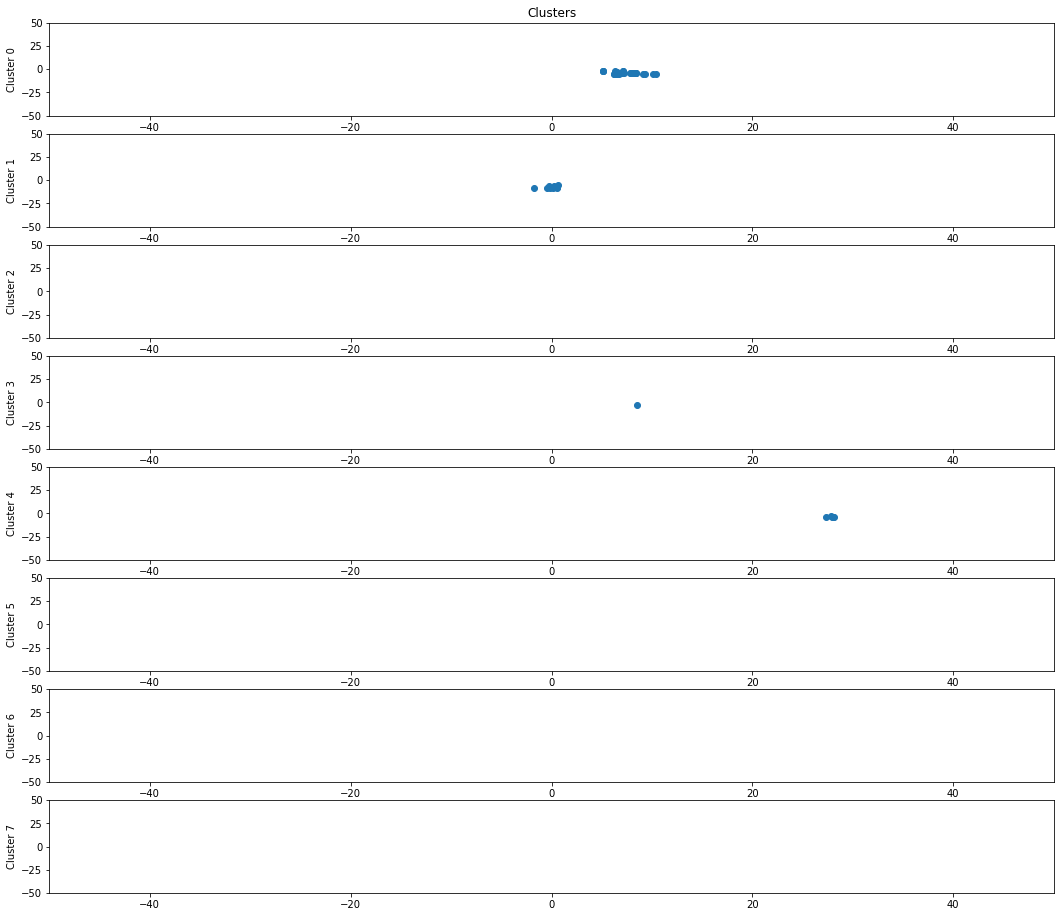

In [176]:
i=0
fig=plt.figure(figsize=(18, 16))
for clus in clustest:
    plt.subplot(len(clustest), 1, i+1)
    plt.plot(clus[0], clus[1], 'o')
    if i == 0:
        plt.title('Clusters')
    plt.ylabel('Cluster ' + str(i))
    plt.xlim(-50,50)
    plt.ylim(-50,50)
    i+=1

#plt.plot(xtest,ytest,'.')
#,label = 'data of jump lengths')
#plt.yscale('log')
#plt.xscale('log')
#plt.legend()
#plt.xlim(-50,50)
#plt.ylim(-50,50)
plt.show()

i=0
for clus in clustest:
    plt.subplot(len(clustest), 1, i+1)
    plt.plot(clus[0], clus[1], 'o')
    if i == 0:
        plt.title('Clusters')
    plt.ylabel('Cluster ' + str(i))
    plt.xlim(-50,50)
    plt.ylim(-50,50)
    i+=1

#plt.plot(xtest,ytest,'.')
#,label = 'data of jump lengths')
#plt.yscale('log')
#plt.xscale('log')
#plt.legend()
plt.xlim(-50,50)
plt.ylim(-50,50)
plt.show()

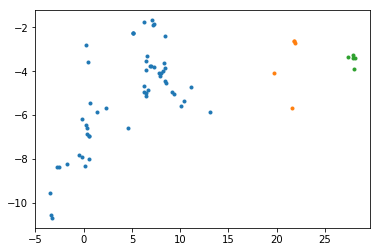

In [228]:
i=0
#fig=plt.figure(figsize=(18, 16))
for clus in clustest:
    plt.plot(clus[0], clus[1], '.')
    i+=1

#plt.plot(xtest,ytest,'.')
#,label = 'data of jump lengths')
#plt.yscale('log')
#plt.xscale('log')
#plt.legend()
#plt.xlim(-50,50)
#plt.ylim(-50,50)
plt.show()

In [57]:
ytest

array([-2.79881796e+00, -2.79918214e+00, -4.53052047e+00, -6.59945257e+00,
       -6.95290273e+00, -5.33991468e+00, -5.84968928e+00, -2.92107244e+01,
       -3.02393793e+01, -4.06008646e+00, -7.73665796e+00, -7.73665796e+00,
       -8.37230823e+00, -2.28086380e+00, -1.85760993e+00, -5.66143916e+00,
       -3.93305471e+00, -1.01229605e+01, -2.15301545e+01, -4.24552449e+01,
       -4.55047317e+01, -2.43621604e+01, -3.97432642e+00, -3.90784386e+00,
       -3.90240498e+00, -3.34579605e+00, -3.26153511e+00, -4.07337928e+00,
       -5.03887945e+00, -4.71947936e+00, -2.14779523e+00, -3.51298662e-01,
        4.68289308e+00,  3.18845795e+01,  6.70655710e+01,  1.50941476e+01,
        5.18238396e+00,  2.29685534e-01, -6.87391091e+00, -3.63315240e+00,
       -6.84001802e+00, -4.93394740e+00,  6.56872442e+01,  6.58875797e+01,
       -3.76319578e+00, -5.83961354e+00, -3.79439589e+00, -6.95290273e+00,
       -5.56723339e+00, -7.80890700e+00,  9.83888329e-01,  2.29685534e-01,
        2.00477981e+00,  

In [59]:
xtest

array([ 4.43559154e+00,  2.66205224e+01,  1.05523122e+01,  3.91570239e-01,
        6.27902719e-01,  1.27687317e+01,  1.64788293e+00, -8.82426317e+00,
       -7.65137909e+00,  9.65071512e+00,  4.03057708e+01,  4.03057708e+01,
       -3.19175665e+00,  6.25937825e+00,  9.02218256e+00,  2.65323367e+01,
        8.01346591e+00,  4.84835664e+00, -3.69670051e-02, -1.95858238e+01,
       -4.09244533e+01, -9.42682567e+00,  1.01587512e+01,  3.51016620e+01,
        3.45576404e+01,  3.37113720e+01,  3.43216298e+01,  2.43241101e+01,
        1.15032866e+01,  1.37046146e+01,  1.36459724e+01,  2.47816806e+00,
       -1.07129760e+01, -3.67544087e+01, -1.42870922e+02, -2.26782235e+01,
       -1.16679696e+01,  2.77605182e+01,  4.78936537e+01,  1.02299641e+01,
        3.82843377e-01,  7.68832550e+00, -1.44692581e+02, -1.44944489e+02,
        8.52054044e+00,  1.61390503e+01,  8.91378785e+00,  6.27902719e-01,
        1.24561515e+01, -5.93528959e-01,  2.68953329e+01,  2.77605182e+01,
        1.22366947e+00,  

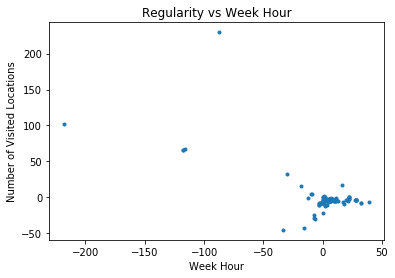

In [180]:
'''Regularity vs Week Hour'''
plt.xlabel('Week Hour')
plt.ylabel('Number of Visited Locations')
plt.title('Regularity vs Week Hour')

#plt.plot(rg,Pi_Max,'.')#,label = 'True Entropy')

plt.plot(xtest,ytest,'.')
#,label = 'data of jump lengths')
#plt.yscale('log')
#plt.xscale('log')
#plt.legend()
#plt.ylim(0,1)
plt.show()